In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dython import nominal

In [160]:
def plot_wage_feature_bars(df, feature, target_var='wage'):
    
    '''
    Given a set of categorical features + target variable (wage), it will plot a pair of
    bar charts for each categorical class showing the percentage of that class earning
    less than 50000 and the percentage earning more than 50000
    
    Inputs:
    
    df:pd.DataFrame - dataframe to analyze
    feature:str - column to compare wage values against
    target_var:str - target variable (in this case always "wage")
    
    Outputs:
    
    matplotlib.pyplot
    '''
    
    gt_50000 = df[df.wage == ' 50000+.'][feature].value_counts().sort_index().values
    lt_50000 = df[df.wage == ' - 50000.'][feature].value_counts().sort_index().values

    ft_values = df[feature].value_counts().sort_index().values
    
    # Handle specific cases below where a label is not found for wages > 50000
    
    if len(gt_50000) != len(lt_50000):
        print(len(gt_50000))
        print(len(lt_50000))
        gt_50000 = np.insert(gt_50000, int(np.where((ft_values - lt_50000 ) == 0)[0]), 0)
    
    labels = df[feature].value_counts().sort_index().index.to_list()
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects0 = ax.bar(x - width/2, lt_50000/ft_values*100, width, label='50000 -')
    rects1 = ax.bar(x + width/2, gt_50000/ft_values*100, width, label='50000 +')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage')
    ax.set_title('')
    ax.set_xticks(x, labels, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()

    plt.show()

Let's read in our datasets:

In [4]:
train_df = pd.read_csv('data/census_income_learn.csv', header=None)
test_df = pd.read_csv('data/census_income_test.csv', header=None)

In [5]:
with open('data/census_income_metadata.txt') as f:
    metadata = f.readlines()

In [7]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [8]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [9]:
print(train_df.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')


In [10]:
print(test_df.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')


Both look they contain the same columns, however they're not labelled properly, can see inside `metadata.txt` file that there is a mapping to our numerical labels, so we will give the columns their proper labels so we can begin to interpret the data:

In [20]:
df_columns = [n.split(':')[0] for n in metadata[142:]]

There seems to be a duplicate column called `| instance weight` - we will drop this

In [17]:
df_columns.remove( '| instance weight')

Our target variable (column `41`) does not have a mapping, so we will just add it and label it `wage`

In [18]:
df_columns.append('wage')

In [19]:
train_df.columns = df_columns
test_df.columns = df_columns

Save this for future use:

In [130]:
train_df.to_csv('data/census_income_learn_clean.csv', index=0)
test_df.to_csv('data/census_income_test_clean.csv', index=0)

Now we can begin to do some analysis to better understand the data we have

In [23]:
train_df.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [24]:
test_df.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000
mean,34.628596,15.332812,11.331118,54.461268,425.788577,35.919458,192.494727,1739.542838,1.956156,0.178505,1.519827,23.185331,94.500652
std,22.333449,18.026709,14.459589,270.202643,4616.795578,265.525252,1841.728492,994.900902,2.364331,0.558316,0.848229,24.389184,0.500002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.260000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1058.050000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1615.395000,1.000000,0.000000,2.000000,8.000000,95.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2187.277500,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9900.000000,99999.000000,4608.000000,99999.000000,16258.200000,6.000000,2.000000,2.000000,52.000000,95.000000


Initially looking at the statistics of both our `train` and `test` set it appears as a sanity check that they come from the same distribution of data, which gives us confidence we can use the `train` set to make predictions on the `test` set 

In [26]:
train_df.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
 

There are a lot of columns to go through here, I am going to take a look at some simple ones that to me stand out as potentially having an impact on `wage`

#### wage per hour

Seems like an obvious metric that would be linked to the yearly `wage` of someonee

In [59]:
train_df['wage per hour'].value_counts()

0       188219
500        734
600        546
700        534
800        507
         ...  
1199         1
8600         1
1862         1
2299         1
1092         1
Name: wage per hour, Length: 1240, dtype: int64

In [62]:
train_df['wage per hour'].describe()

count    199523.000000
mean         55.426908
std         274.896454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9999.000000
Name: wage per hour, dtype: float64

Splitting it into bins to make it more interpretable

In [103]:
train_df['wage_per_hour_bins'] = pd.cut(train_df['wage per hour'], bins=[0,1,100,1000, 9999], include_lowest = True).apply(lambda x: str(x)).astype(str)

train_df['wage_per_hour_bins'].value_counts()

(-0.001, 1.0]       188219
(100.0, 1000.0]       7528
(1000.0, 9999.0]      3761
(1.0, 100.0]            15
Name: wage_per_hour_bins, dtype: int64

Can see the vast majority `wage per hour` is 0. Which tells us according to the `census_income_additional_info.pdf` that most people are not being paid on an hourly basis 

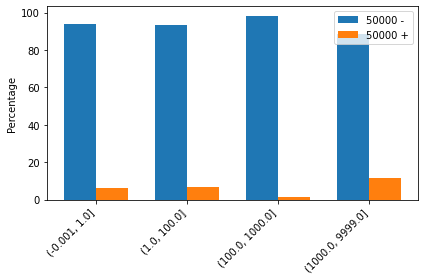

In [70]:
plot_wage_feature_bars(train_df, 'wage_per_hour_bins')

Visually we can see that people reporting a `wage per hour` of > 1000 seem to be more likely to earn `50000 +` however, there are very few datapoints here as it is dwarfed by the vast majority reporting `0`, so this is probably not a good metric to use for training

#### age

Splitting age into bins for interpretability:

In [104]:
train_df['age_bins'] = pd.cut(train_df['age'], bins=[0,18,29,35,45,55,65,75,90], include_lowest = True).apply(lambda x: str(x)).astype(str)

# Converting to str type for later convenience

In [72]:
train_df['age_bins'].value_counts()

(-0.001, 18.0]    58476
(35.0, 45.0]      30817
(18.0, 29.0]      29658
(45.0, 55.0]      22082
(29.0, 35.0]      20021
(55.0, 65.0]      15730
(65.0, 75.0]      13576
(75.0, 90.0]       9163
Name: age_bins, dtype: int64

In [74]:
train_df['age'].describe()

count    199523.000000
mean         34.494199
std          22.310895
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64

And now plotting the perceentage bar charts of how much our age bins earn:

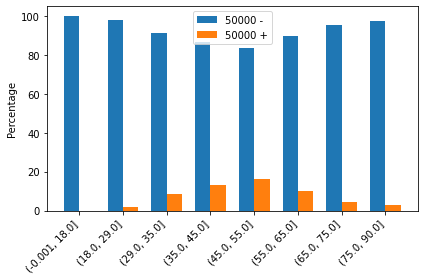

In [75]:
plot_wage_feature_bars(train_df, 'age_bins')

We can see here a clear relationship between your `age` and your yearly `wage`. As a sanity check, this also makes sense as it shows little earnings for young people before a rise into your 40s and 50s and then declining towards the retirement age

#### class of worker

Intuitively, one might expect the `class of worker` to have an impact on your yearly `wage`

In [77]:
train_df['class of worker'].value_counts()

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class of worker, dtype: int64

We see a large majority are `Not in universe` meaning they may be children / in armed force or not currently working for other reasons

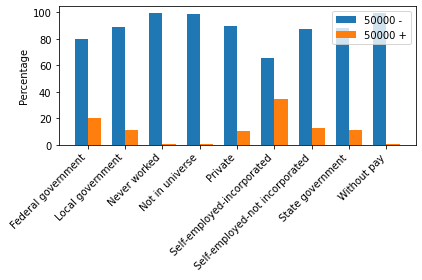

In [78]:
plot_wage_feature_bars(train_df, 'class of worker')

We see vast differences in the earnings of different `class of worker`'s - those who are `self-emploted-incorporated` (business owners) are the most likely to be earning 50000 + while rather obviously those `without pay / never worked / not in universe` are the least likely to earn over 50000 +. This seems like a useful predictor for our target class

#### education

Would think that `education` would have a big impact on future earnings:

In [79]:
train_df['education'].value_counts()

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: education, dtype: int64

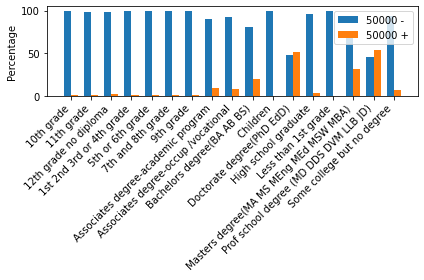

In [157]:
plot_wage_feature_bars(train_df, 'education')

#### sex

In [95]:
train_df['sex'].value_counts()

 Female    103984
 Male       95539
Name: sex, dtype: int64

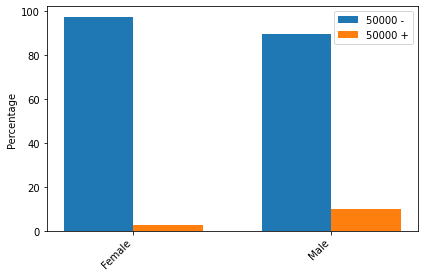

In [96]:
plot_wage_feature_bars(train_df, 'sex')

Can see here that `Male`'s are more likely to earn over 50000 compared to `Female`'s. This again may be a useful metric

So looking here, we can see choosing some simple features that there are clear relationships between our features and target variable. To explore this further with similar graphs for more features would be quite time consuming, so to get a better idea of useful features I will plot a `correlation matrix` to see the relationship between all the features, including our target variable `wage`.

Here I've use a python package that calculates for me the correlation of categorical as well as numerical features

_(converted my binned columns to str's earlier to work with this function)_

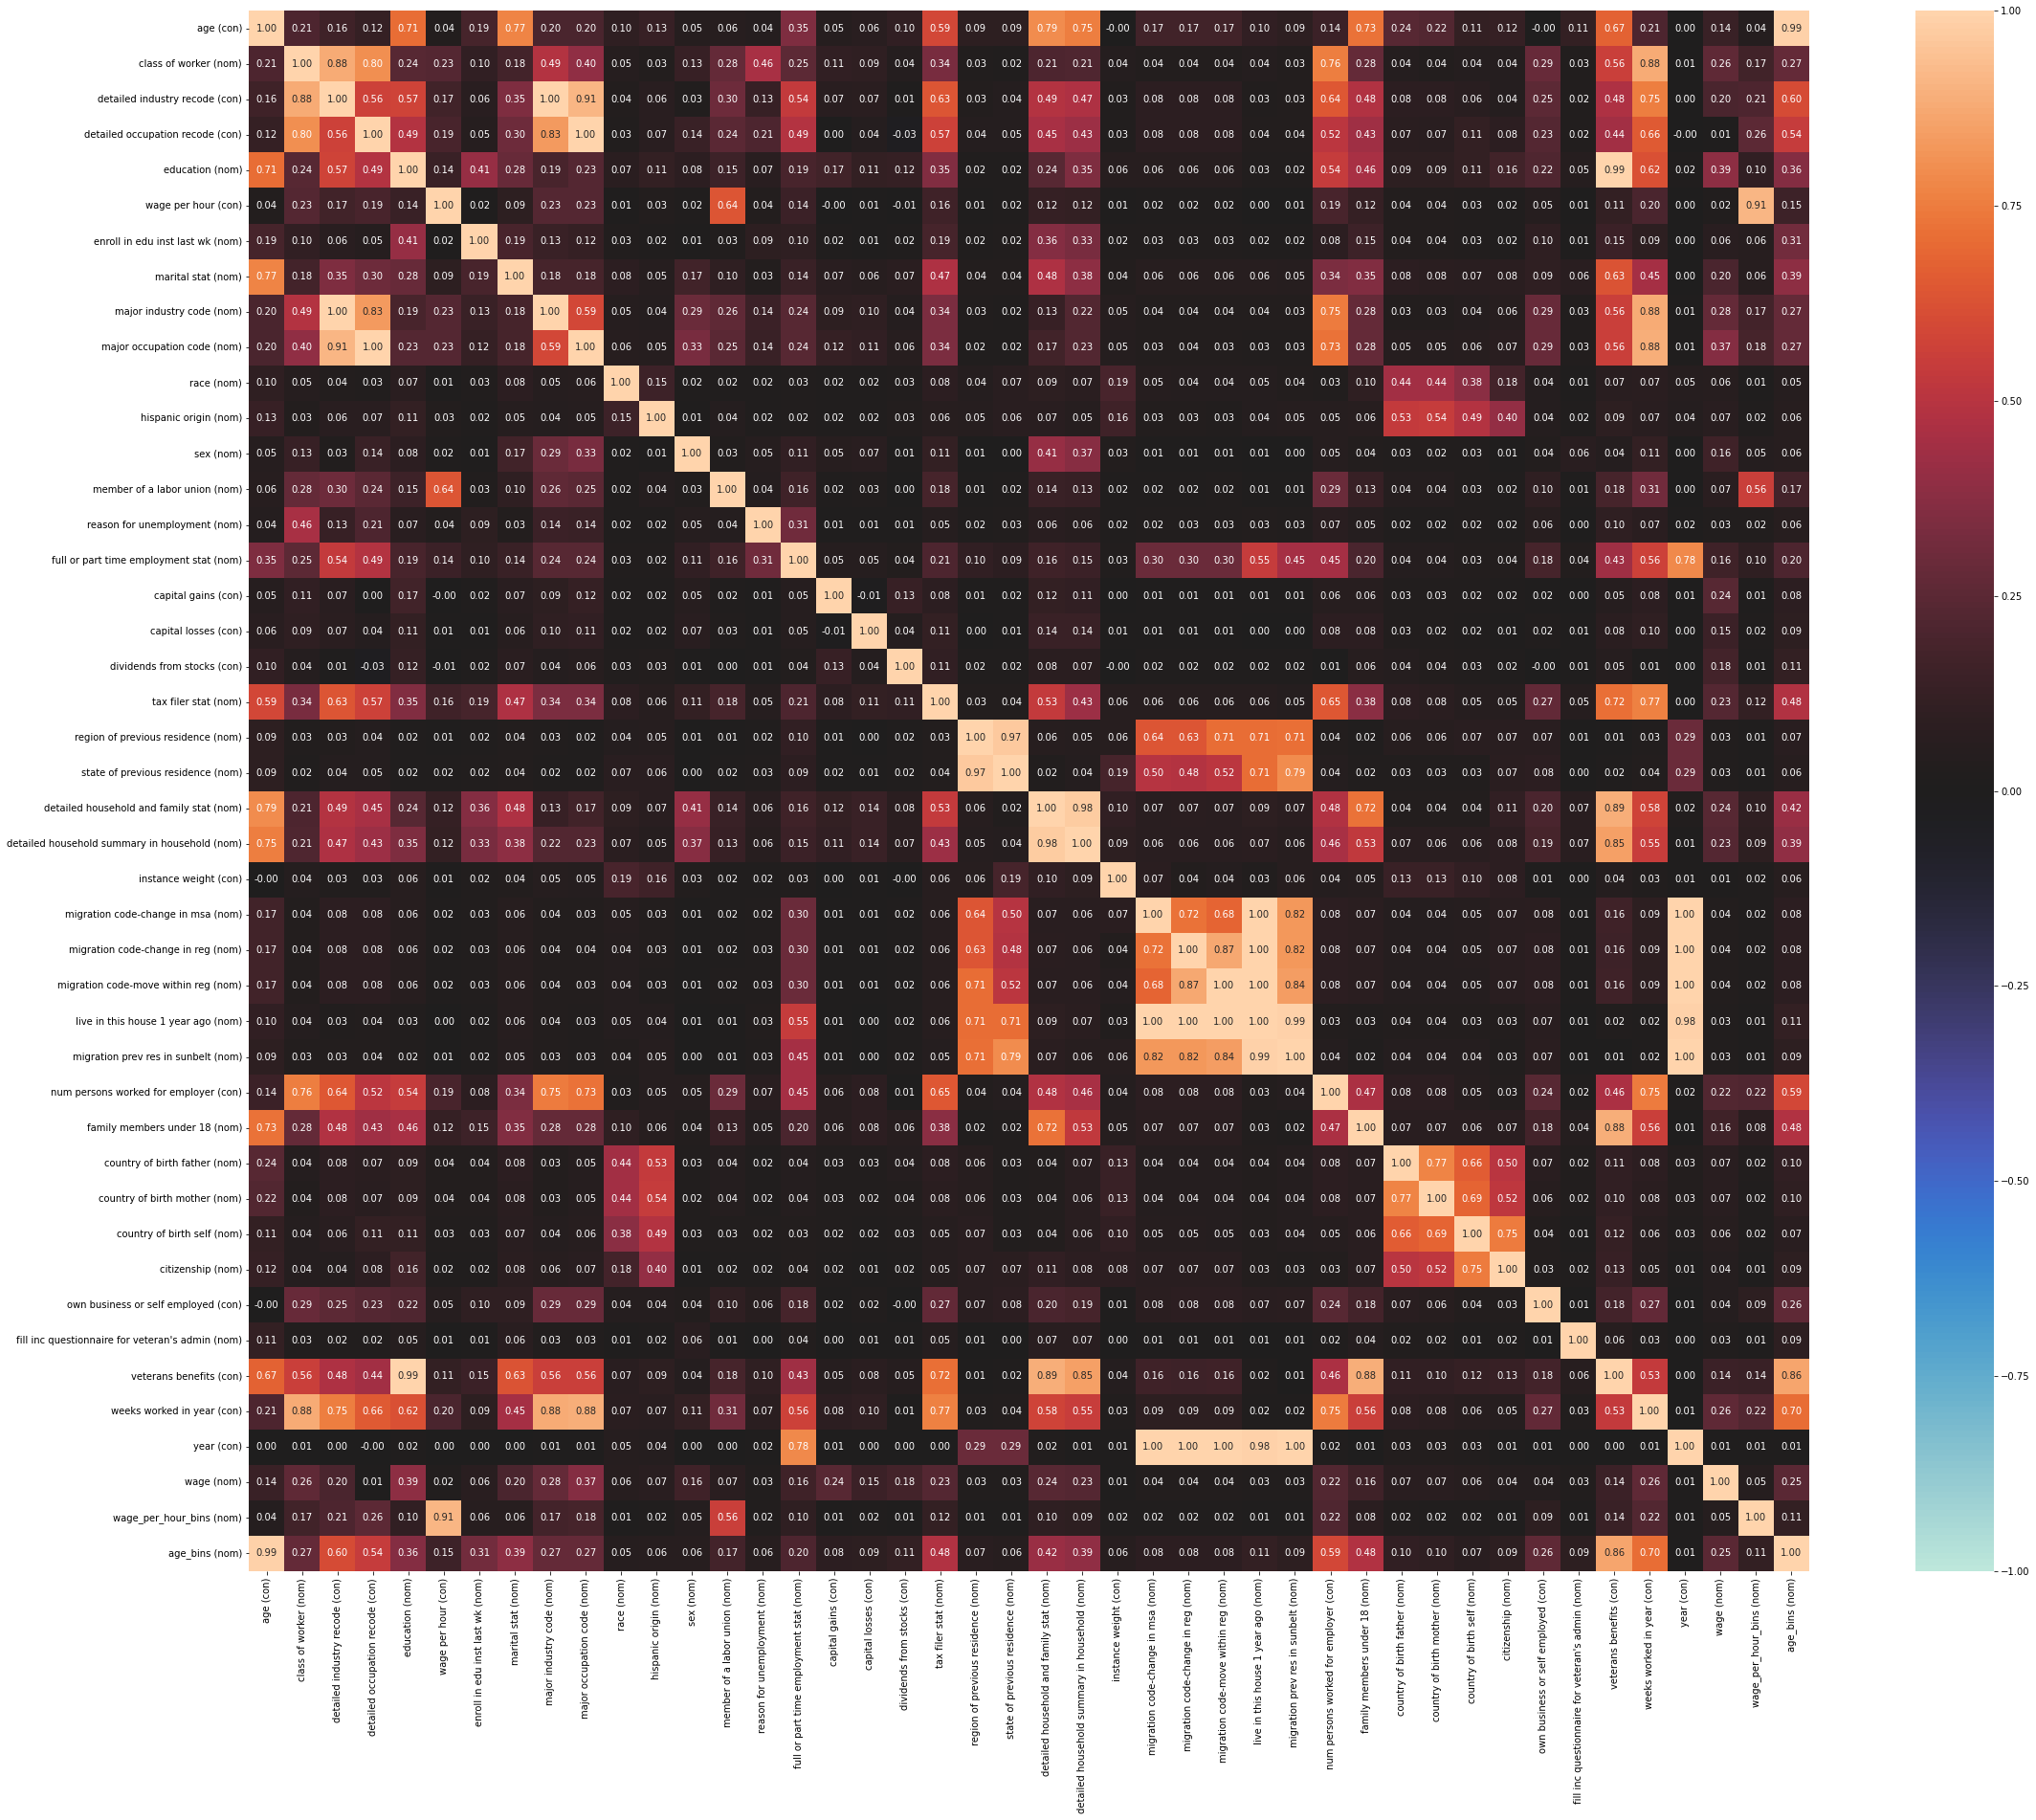

In [105]:
nominal.associations(train_df, figsize=(40,30), mark_columns=True);

The values can range from -1 to 1 with negative values telling us the compared feature negatively correlates and positive values telling us the compared feature positively correlates

Looking at the `wage` row (3rd from bottom) - we can see the correlation between it and the rest of our features.

The features that most strongly correlate with `wage` are:

`['education', 'class of worker', 'detailed industry recode', 'major industry code', 'major occupation code',
  'sex', 'capital gains', 'dividends from stocks', 'tax filer stat', 'detailed household and family stat',
  'detailed household summary in household', 'num persons worked for employer', 'weeks worked in year']`

Looking at these, a lot of them make sense intuitively, a few of the ones we explicity looked at are there as well as a lot that look at your occupation and finances. Let's again look at a few more of these to get a clearer understanding of these useful features:

#### detailed household summary in household

7
8


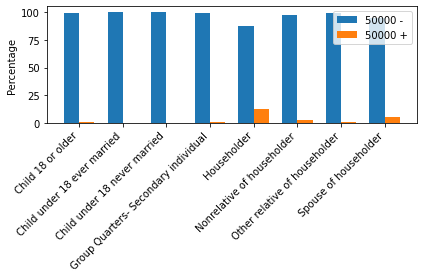

In [164]:
plot_wage_feature_bars(train_df, 'detailed household summary in household')

This makes sense that people who are able to afford a house and who are not children are more likely to earn > 50000

In [168]:
train_df[train_df['detailed household summary in household']==' Householder']['age_bins'].value_counts()

(35.0, 45.0]      17160
(45.0, 55.0]      12670
(29.0, 35.0]      10374
(18.0, 29.0]      10145
(55.0, 65.0]       9402
(65.0, 75.0]       8866
(75.0, 90.0]       6715
(-0.001, 18.0]      143
Name: age_bins, dtype: int64

We can see the majority of homeowners are in their prime working ages, which correlates with earlier that told us that people within the range 30-60 are most likely to earn > 50000

#### major industry code

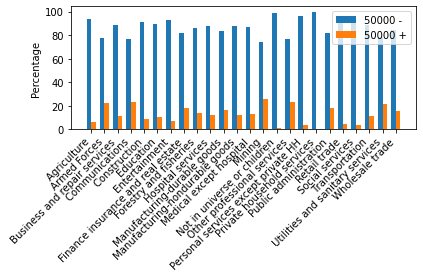

In [119]:
plot_wage_feature_bars(train_df, 'major industry code')

Type of industry you work in has an impact on your salary

#### capital gains & dividends from stocks

Bin these for interpretability:

In [116]:
train_df['capital_gains_bins'] = pd.cut(train_df['capital gains'], bins=[0,1,100,5000,10000,99999], include_lowest = True)
train_df['dividends_from_stocks_bins'] = pd.cut(train_df['dividends from stocks'], bins=[0,1,100,5000,10000,99999], include_lowest = True)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


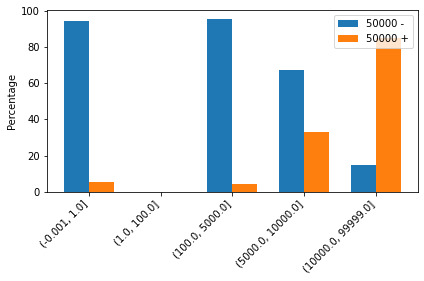

In [117]:
plot_wage_feature_bars(train_df, 'capital_gains_bins')

Can also see below that those with large `capital gains` tend to be higher educated

In [186]:
train_df[train_df['capital_gains_bins']==pd.Interval(left=10000., right=99999., closed='right')]['education'].value_counts()

 Bachelors degree(BA AB BS)                580
 Masters degree(MA MS MEng MEd MSW MBA)    299
 High school graduate                      241
 Prof school degree (MD DDS DVM LLB JD)    238
 Some college but no degree                227
 Doctorate degree(PhD EdD)                 122
 Associates degree-occup /vocational        47
 Associates degree-academic program         42
 10th grade                                 13
 11th grade                                 12
 7th and 8th grade                           9
 9th grade                                   9
 12th grade no diploma                       4
 Less than 1st grade                         2
 5th or 6th grade                            1
Name: education, dtype: int64

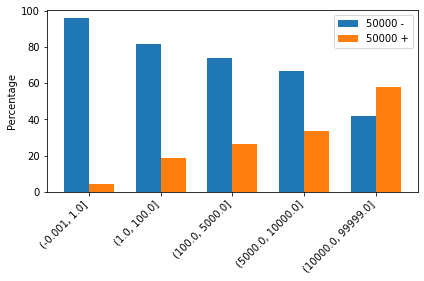

In [118]:
plot_wage_feature_bars(train_df, 'dividends_from_stocks_bins')

Can see `capital gains` and `dividends from stocks` which presumably only apply to relatively wealthy people so would give a very strong indication on if your earnings are above or below 50000

#### tax filer stat

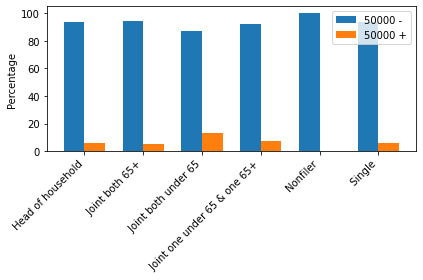

In [123]:
plot_wage_feature_bars(train_df, 'tax filer stat')

Can see that working age joint tax filers earn more than other generally. Non filers (those not paying tax) are very unlikely to earn above 50000 

#### num persons worked for employer

In [128]:
train_df['num persons worked for employer'].value_counts()

0    95983
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: num persons worked for employer, dtype: int64

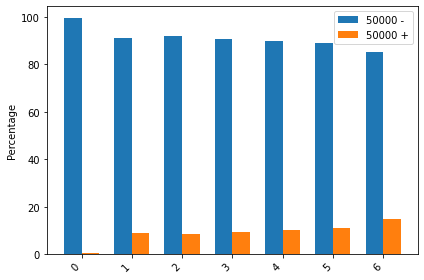

In [126]:
plot_wage_feature_bars(train_df, 'num persons worked for employer')

This again makes sense as it tells us there is a strong correlation between your yearly `wage` and the number of employees working for you. (Note x axis values don't represent the number of employees but rather a set of bins where `0 = nui` and `6 = 1000+ employees`

In [129]:
train_df[train_df['num persons worked for employer']>0]['class of worker'].value_counts()

 Private                           69289
 Not in universe                    8237
 Self-employed-not incorporated     8025
 Local government                   7620
 State government                   4123
 Self-employed-incorporated         3203
 Federal government                 2866
 Without pay                         136
 Never worked                         41
Name: class of worker, dtype: int64

#### Conclusions

- We can see that the most of the highly correlated features with `wage` revolve around one's education, type of employment and financial records. In retrospect, this makes a lot of sense as it is understood that a good education allows you to find high paying jobs which then in turn expose you to financial opportunties like dividends and capital gains. And your age determines for the most part your eligibility to work as well as somewhat being a barrier to higher earnings, with peak wages occuring in between your 30s and 50s


- It is interesting to note that features around your residence and family background seem to have little impact on your `wage`


- I believe that the features revolving around educaiton, financial records, age and type of employment have the most impact on your yearly `wage`. Therefore I will work with these types of features in my further modeling to try and prove this hypothesis